<a href="https://colab.research.google.com/github/patroswastik/Stock-Market-Predictor/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [ ]:
%tensorflow.__version__

UsageError: Line magic function `%tensorflow.__version__` not found.


In [ ]:
keras.__version__

'2.3.1'

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",500)

from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.models import load_model
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# **Mount Drive**

In [ ]:
# Run this cell to mount your Google Drive & load files from there
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# drive.flush_and_unmount()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **Load Data**

In [ ]:
# data=pd.read_csv("preprocess_v2.csv")
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/preprocess_v2.csv")

In [ ]:
data.head()

,Unnamed: 0,Unnamed: 0.1,name,establishment,city_id,locality_verbose,cuisines,timings,average_cost_for_two,highlights,aggregate_rating,delivery,cuisine_1,cuisine_2,cuisine_3,cuisine_4,cuisine_5,cuisine_6,cuisine_7,cuisine_8,cuisine_9,cuisine_10,cuisine_11,cuisine_12,cuisine_13,cuisine_14,cuisine_15,cuisine_16,cuisine_17,cuisine_18,cuisine_19,cuisine_20,cuisine_21,cuisine_22,cuisine_23,cuisine_24,cuisine_25,cuisine_26,cuisine_27,cuisine_28,cuisine_29,cuisine_30,cuisine_31,cuisine_32,cuisine_33,cuisine_34,cuisine_35,cuisine_36,cuisine_37,cuisine_38,cuisine_39,cuisine_40,cuisine_41,cuisine_42,cuisine_43,cuisine_44,cuisine_45,cuisine_46,cuisine_47,cuisine_48,cuisine_49,cuisine_50,cuisine_51,cuisine_52,cuisine_53,cuisine_54,cuisine_55,cuisine_56,cuisine_57,cuisine_58,cuisine_59,cuisine_60,cuisine_61,cuisine_62,cuisine_63,cuisine_64,cuisine_65,cuisine_66,cuisine_67,cuisine_68,cuisine_69,cuisine_70,cuisine_71,cuisine_72,cuisine_73,cuisine_74,cuisine_75,cuisine_76,cuisine_77,cuisine_78,cuisine_79,cuisine_80,cuisine_81,cuisine_82,cuisine_83,cuisine_84,cuisine_85,cuisine_86,cuisine_87,cuisine_88,cuisine_89,cuisine_90,cuisine_91,cuisine_92,cuisine_93,cuisine_94,cuisine_95,cuisine_96,cuisine_97,cuisine_98,cuisine_99,cuisine_100,cuisine_101,cuisine_102,cuisine_103,cuisine_104,cuisine_105,cuisine_106,cuisine_107,cuisine_108,cuisine_109,cuisine_110,cuisine_111,cuisine_112,cuisine_113,cuisine_114,cuisine_115,cuisine_116,cuisine_117,cuisine_118,cuisine_119,cuisine_120,cuisine_121,cuisine_122,cuisine_123,cuisine_124,cuisine_125,cuisine_126,cuisine_127,cuisine_128,cuisine_129,cuisine_130,cuisine_131,cuisine_132,cuisine_133,highlight_1,highlight_2,highlight_3,highlight_4,highlight_5,highlight_6,highlight_7,highlight_8,highlight_9,highlight_10,highlight_11,highlight_12,highlight_13,highlight_14,highlight_15,highlight_16,highlight_17,highlight_18,highlight_19,highlight_20,highlight_21,highlight_22,highlight_23,highlight_24,highlight_25,highlight_26,highlight_27,highlight_28,highlight_29,highlight_30,highlight_31,highlight_32,highlight_33,highlight_34,highlight_35,highlight_36,highlight_37,highlight_38,highlight_39,highlight_40,highlight_41,highlight_42,highlight_43,highlight_44,highlight_45,highlight_46,highlight_47,highlight_48,highlight_49,highlight_50,highlight_51,highlight_52,highlight_53,highlight_54,highlight_55,highlight_56,highlight_57,highlight_58,highlight_59,highlight_60,highlight_61,highlight_62,highlight_63,highlight_64,highlight_65,highlight_66,highlight_67,highlight_68,highlight_69,highlight_70,highlight_71,highlight_72,highlight_73,highlight_74,highlight_75,highlight_76,highlight_77,highlight_78,highlight_79,highlight_80,highlight_81,highlight_82,highlight_83,highlight_84,highlight_85,highlight_86,highlight_87,highlight_88,highlight_89,highlight_90,highlight_91,highlight_92,highlight_93,highlight_94,highlight_95,highlight_96,highlight_97,highlight_98,highlight_99,highlight_100,highlight_101,highlight_102,highlight_103,highlight_104,start_time,end_time,start,end
0,0,0,4476,23,34,1764,"North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),350,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8:30am,10:30pm,830,2230
1,1,1,21211,23,34,74,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",300,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
print(data.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'name', 'establishment', 'city_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'highlights',
       ...
       'highlight_99', 'highlight_100', 'highlight_101', 'highlight_102',
       'highlight_103', 'highlight_104', 'start_time', 'end_time', 'start',
       'end'],
      dtype='object', length=253)


In [ ]:
data=data.drop(['cuisines','timings','highlights','start_time','end_time','Unnamed: 0','Unnamed: 0.1','name','city_id'],axis=1)

In [ ]:
data.head()

,establishment,locality_verbose,average_cost_for_two,aggregate_rating,delivery,cuisine_1,cuisine_2,cuisine_3,cuisine_4,cuisine_5,cuisine_6,cuisine_7,cuisine_8,cuisine_9,cuisine_10,cuisine_11,cuisine_12,cuisine_13,cuisine_14,cuisine_15,cuisine_16,cuisine_17,cuisine_18,cuisine_19,cuisine_20,cuisine_21,cuisine_22,cuisine_23,cuisine_24,cuisine_25,cuisine_26,cuisine_27,cuisine_28,cuisine_29,cuisine_30,cuisine_31,cuisine_32,cuisine_33,cuisine_34,cuisine_35,cuisine_36,cuisine_37,cuisine_38,cuisine_39,cuisine_40,cuisine_41,cuisine_42,cuisine_43,cuisine_44,cuisine_45,cuisine_46,cuisine_47,cuisine_48,cuisine_49,cuisine_50,cuisine_51,cuisine_52,cuisine_53,cuisine_54,cuisine_55,cuisine_56,cuisine_57,cuisine_58,cuisine_59,cuisine_60,cuisine_61,cuisine_62,cuisine_63,cuisine_64,cuisine_65,cuisine_66,cuisine_67,cuisine_68,cuisine_69,cuisine_70,cuisine_71,cuisine_72,cuisine_73,cuisine_74,cuisine_75,cuisine_76,cuisine_77,cuisine_78,cuisine_79,cuisine_80,cuisine_81,cuisine_82,cuisine_83,cuisine_84,cuisine_85,cuisine_86,cuisine_87,cuisine_88,cuisine_89,cuisine_90,cuisine_91,cuisine_92,cuisine_93,cuisine_94,cuisine_95,cuisine_96,cuisine_97,cuisine_98,cuisine_99,cuisine_100,cuisine_101,cuisine_102,cuisine_103,cuisine_104,cuisine_105,cuisine_106,cuisine_107,cuisine_108,cuisine_109,cuisine_110,cuisine_111,cuisine_112,cuisine_113,cuisine_114,cuisine_115,cuisine_116,cuisine_117,cuisine_118,cuisine_119,cuisine_120,cuisine_121,cuisine_122,cuisine_123,cuisine_124,cuisine_125,cuisine_126,cuisine_127,cuisine_128,cuisine_129,cuisine_130,cuisine_131,cuisine_132,cuisine_133,highlight_1,highlight_2,highlight_3,highlight_4,highlight_5,highlight_6,highlight_7,highlight_8,highlight_9,highlight_10,highlight_11,highlight_12,highlight_13,highlight_14,highlight_15,highlight_16,highlight_17,highlight_18,highlight_19,highlight_20,highlight_21,highlight_22,highlight_23,highlight_24,highlight_25,highlight_26,highlight_27,highlight_28,highlight_29,highlight_30,highlight_31,highlight_32,highlight_33,highlight_34,highlight_35,highlight_36,highlight_37,highlight_38,highlight_39,highlight_40,highlight_41,highlight_42,highlight_43,highlight_44,highlight_45,highlight_46,highlight_47,highlight_48,highlight_49,highlight_50,highlight_51,highlight_52,highlight_53,highlight_54,highlight_55,highlight_56,highlight_57,highlight_58,highlight_59,highlight_60,highlight_61,highlight_62,highlight_63,highlight_64,highlight_65,highlight_66,highlight_67,highlight_68,highlight_69,highlight_70,highlight_71,highlight_72,highlight_73,highlight_74,highlight_75,highlight_76,highlight_77,highlight_78,highlight_79,highlight_80,highlight_81,highlight_82,highlight_83,highlight_84,highlight_85,highlight_86,highlight_87,highlight_88,highlight_89,highlight_90,highlight_91,highlight_92,highlight_93,highlight_94,highlight_95,highlight_96,highlight_97,highlight_98,highlight_99,highlight_100,highlight_101,highlight_102,highlight_103,highlight_104,start,end
0,23,1764,350,4.4,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,830,2230
1,23,74,300,4.4,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1230,2400
2,23,3149,300,4.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

# **Create 2 sets:**

1.   Predict: Avg cost
2.   Predict: Avg rating



In [ ]:
y1=data[['average_cost_for_two']]
y2=data[['aggregate_rating']]

In [ ]:
X1=data.drop(['average_cost_for_two'], axis=1)
X2=data.drop(['aggregate_rating'], axis=1)

In [ ]:
print("X1 shape: ", X1.shape, "X2 shape: ", X2.shape)
print("y1 shape: ", y1.shape, "y2 shape: ", y2.shape)

X1 shape:  (207058, 243) X2 shape:  (207058, 243)
y1 shape:  (207058, 1) y2 shape:  (207058, 1)


In [ ]:
X1_train,X1_test,y1_train,y1_test=model_selection.train_test_split(X1,y1)
X2_train,X2_test,y2_train,y2_test=model_selection.train_test_split(X2,y2)

## **Neural Newtworks**

In [ ]:
X1=data.drop(['average_cost_for_two'], axis=1)
y1=data[['average_cost_for_two']]
X2=data.drop(['aggregate_rating'], axis=1)
y2=data[['aggregate_rating']]

In [ ]:
X1.head()

,establishment,locality_verbose,aggregate_rating,delivery,cuisine_1,cuisine_2,cuisine_3,cuisine_4,cuisine_5,cuisine_6,cuisine_7,cuisine_8,cuisine_9,cuisine_10,cuisine_11,cuisine_12,cuisine_13,cuisine_14,cuisine_15,cuisine_16,cuisine_17,cuisine_18,cuisine_19,cuisine_20,cuisine_21,cuisine_22,cuisine_23,cuisine_24,cuisine_25,cuisine_26,cuisine_27,cuisine_28,cuisine_29,cuisine_30,cuisine_31,cuisine_32,cuisine_33,cuisine_34,cuisine_35,cuisine_36,cuisine_37,cuisine_38,cuisine_39,cuisine_40,cuisine_41,cuisine_42,cuisine_43,cuisine_44,cuisine_45,cuisine_46,cuisine_47,cuisine_48,cuisine_49,cuisine_50,cuisine_51,cuisine_52,cuisine_53,cuisine_54,cuisine_55,cuisine_56,cuisine_57,cuisine_58,cuisine_59,cuisine_60,cuisine_61,cuisine_62,cuisine_63,cuisine_64,cuisine_65,cuisine_66,cuisine_67,cuisine_68,cuisine_69,cuisine_70,cuisine_71,cuisine_72,cuisine_73,cuisine_74,cuisine_75,cuisine_76,cuisine_77,cuisine_78,cuisine_79,cuisine_80,cuisine_81,cuisine_82,cuisine_83,cuisine_84,cuisine_85,cuisine_86,cuisine_87,cuisine_88,cuisine_89,cuisine_90,cuisine_91,cuisine_92,cuisine_93,cuisine_94,cuisine_95,cuisine_96,cuisine_97,cuisine_98,cuisine_99,cuisine_100,cuisine_101,cuisine_102,cuisine_103,cuisine_104,cuisine_105,cuisine_106,cuisine_107,cuisine_108,cuisine_109,cuisine_110,cuisine_111,cuisine_112,cuisine_113,cuisine_114,cuisine_115,cuisine_116,cuisine_117,cuisine_118,cuisine_119,cuisine_120,cuisine_121,cuisine_122,cuisine_123,cuisine_124,cuisine_125,cuisine_126,cuisine_127,cuisine_128,cuisine_129,cuisine_130,cuisine_131,cuisine_132,cuisine_133,highlight_1,highlight_2,highlight_3,highlight_4,highlight_5,highlight_6,highlight_7,highlight_8,highlight_9,highlight_10,highlight_11,highlight_12,highlight_13,highlight_14,highlight_15,highlight_16,highlight_17,highlight_18,highlight_19,highlight_20,highlight_21,highlight_22,highlight_23,highlight_24,highlight_25,highlight_26,highlight_27,highlight_28,highlight_29,highlight_30,highlight_31,highlight_32,highlight_33,highlight_34,highlight_35,highlight_36,highlight_37,highlight_38,highlight_39,highlight_40,highlight_41,highlight_42,highlight_43,highlight_44,highlight_45,highlight_46,highlight_47,highlight_48,highlight_49,highlight_50,highlight_51,highlight_52,highlight_53,highlight_54,highlight_55,highlight_56,highlight_57,highlight_58,highlight_59,highlight_60,highlight_61,highlight_62,highlight_63,highlight_64,highlight_65,highlight_66,highlight_67,highlight_68,highlight_69,highlight_70,highlight_71,highlight_72,highlight_73,highlight_74,highlight_75,highlight_76,highlight_77,highlight_78,highlight_79,highlight_80,highlight_81,highlight_82,highlight_83,highlight_84,highlight_85,highlight_86,highlight_87,highlight_88,highlight_89,highlight_90,highlight_91,highlight_92,highlight_93,highlight_94,highlight_95,highlight_96,highlight_97,highlight_98,highlight_99,highlight_100,highlight_101,highlight_102,highlight_103,highlight_104,start,end
0,23,1764,4.4,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,830,2230
1,23,74,4.4,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1230,2400
2,23,3149,4.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
scaler1 = MinMaxScaler()
X1 = scaler1.fit_transform(X1)
scaler2 = MinMaxScaler()
X2 = scaler2.fit_transform(X2)

In [ ]:
X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(X1, y1, random_state=42, shuffle=True)
X2_train, X2_test, y2_train, y2_test = model_selection.train_test_split(X2, y2, random_state=42, shuffle=True)

In [ ]:
# X1_train.head()

In [ ]:
'''train_norm = X1_train[['establishment', 'locality_verbose', 'aggregate_rating', 'start', 'end']]
test_norm = X1_test[['establishment', 'locality_verbose', 'aggregate_rating', 'start', 'end']]

# Normalizing using MinMaxScaler()
cs = MinMaxScaler()
x_train_norm = cs.fit_transform(train_norm)
x_test_norm = cs.transform(test_norm)

#Converting numpy array to dataframe
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns)
X1_train.update(training_norm_col)

# Normalize Testing Data by using mean and SD of training set
x_test_norm = std_scale.transform(test_norm)
testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns)
X1_test.update(testing_norm_col)'''

"train_norm = X1_train[['establishment', 'locality_verbose', 'aggregate_rating', 'start', 'end']]\ntest_norm = X1_test[['establishment', 'locality_verbose', 'aggregate_rating', 'start', 'end']]\n\n# Normalizing using MinMaxScaler()\ncs = MinMaxScaler()\nx_train_norm = cs.fit_transform(train_norm)\nx_test_norm = cs.transform(test_norm)\n\n#Converting numpy array to dataframe\ntraining_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) \nX1_train.update(training_norm_col)\n\n# Normalize Testing Data by using mean and SD of training set\nx_test_norm = std_scale.transform(test_norm)\ntesting_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns) \nX1_test.update(testing_norm_col)"

In [ ]:
'''# Normalizing using StandardScaler()

#Select numerical columns which needs to be normalized
train_norm = X1_train[['establishment', 'locality_verbose', 'aggregate_rating', 'start', 'end']]
test_norm = X1_test[['establishment', 'locality_verbose', 'aggregate_rating', 'start', 'end']]

# Normalize Training Data
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)

#Converting numpy array to dataframe
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns)
X1_train.update(training_norm_col)

# Normalize Testing Data by using mean and SD of training set
x_test_norm = std_scale.transform(test_norm)
testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns)
X1_test.update(testing_norm_col)'''

"# Normalizing using StandardScaler()\n\n#Select numerical columns which needs to be normalized\ntrain_norm = X1_train[['establishment', 'locality_verbose', 'aggregate_rating', 'start', 'end']]\ntest_norm = X1_test[['establishment', 'locality_verbose', 'aggregate_rating', 'start', 'end']]\n\n# Normalize Training Data \nstd_scale = preprocessing.StandardScaler().fit(train_norm)\nx_train_norm = std_scale.transform(train_norm)\n\n#Converting numpy array to dataframe\ntraining_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) \nX1_train.update(training_norm_col)\n\n# Normalize Testing Data by using mean and SD of training set\nx_test_norm = std_scale.transform(test_norm)\ntesting_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns) \nX1_test.update(testing_norm_col)"

In [ ]:
# X1_train.head()

In [ ]:
model = Sequential()

model.add(Dense(600, input_dim=243, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
# model.add(Dense(400, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dropout(0.3))
model.add(Dense(400, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
# model.add(Dense(200, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dropout(0.3))
model.add(Dense(200, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
# model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dropout(0.3))
model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
# model.add(Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dropout(0.3))
model.add(Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
# model.add(Dense(25, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dropout(0.3))
model.add(Dense(25, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1))


# model.add(Dense(100, input_dim=243, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dropout(0.25))
# model.add(Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dropout(0.25))
# model.add(Dense(25, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dropout(0.25))
# model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')

**Model on set 1**

In [ ]:
history = model.fit(X1_train, y1_train,
          batch_size=32,
          epochs=4,
          validation_split=0.2)

Train on 124234 samples, validate on 31059 samples
Epoch 1/4
124234/124234 [==============================] - 47s 376us/step - loss: 87.3094 - val_loss: 66.6228
Epoch 2/4
124234/124234 [==============================] - 46s 372us/step - loss: 79.1820 - val_loss: 61.9812
Epoch 3/4
124234/124234 [==============================] - 46s 370us/step - loss: 76.7202 - val_loss: 59.9382
Epoch 4/4
124234/124234 [==============================] - 47s 375us/step - loss: 75.0724 - val_loss: 59.5156


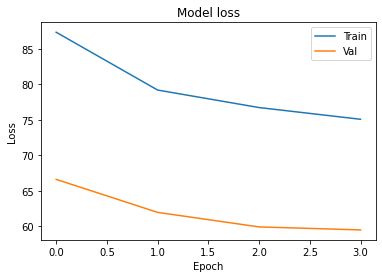

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
pred = model.predict(X1_test)

In [ ]:
y1_test.shape

(51765, 1)

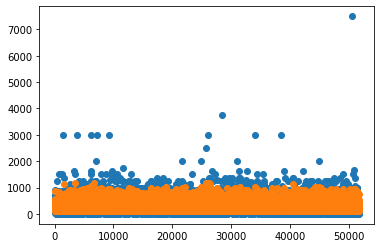

In [ ]:
plt.scatter(range(51765),y1_test)
plt.scatter(range(51765),pred)

In [ ]:
#  model.predict([X1_test])
 model.predict([[X1_test[0]]])

array([[230.67761]], dtype=float32)

In [ ]:
# X1_test.head()
# X1_test[0]

In [ ]:
# y1_test.head()
y1_test.head()

,average_cost_for_two
74270,250
108334,250
159738,450
98087,266
70457,366


In [ ]:
model.save('predict_cost.h5')
scaler_filename = "scaler_cost.save"
joblib.dump(scaler1, scaler_filename)

['scaler_cost.save']

**Model on set 2**

In [ ]:
history = model.fit(X2_train, y2_train,
          batch_size=32,
          epochs=2,
          validation_split=0.2)

Train on 124234 samples, validate on 31059 samples
Epoch 1/2
124234/124234 [==============================] - 48s 389us/step - loss: 5.8263 - val_loss: 1.2607
Epoch 2/2
124234/124234 [==============================] - 48s 387us/step - loss: 0.9057 - val_loss: 0.7682


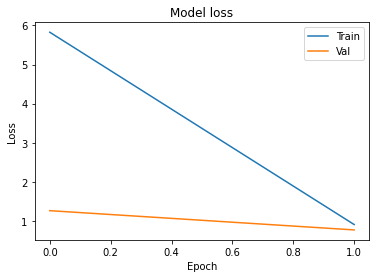

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
#  model.predict([X1_test])
 model.predict([[X2_test[0]]])

array([[3.8372338]], dtype=float32)

In [ ]:
# X1_test.head()
# X1_test[0]

In [ ]:
# y1_test.head()
y2_test.head()

,aggregate_rating
74270,3.9
108334,3.9
159738,3.0
98087,4.4
70457,3.9


In [ ]:
model.save('predict_rating.h5')
scaler_filename = "scaler_rating.save"
joblib.dump(scaler2, scaler_filename)

['scaler_rating.save']

# **Load model**

In [ ]:
# Load list data

cuisines_list = []
with open('cuisines.txt') as f:
  for line in f.readlines():
    cuisines_list.append(line.strip(',\n'))

highlights_list = []
with open('highlights.txt') as f:
  for line in f.readlines():
    highlights_list.append(line.strip(',\n'))

establishment_list = []
with open('establishment.txt') as f:
  for line in f.readlines():
    establishment_list.append(line.strip(',\n'))

locality_list = []
with open('locality.txt') as f:
  for line in f.readlines():
    locality_list.append(line.strip(',\n'))

FileNotFoundError: ignored

In [ ]:
PC_data_columns = ['establishment', 'locality_verbose', 'aggregate_rating', 'delivery', 'cuisine_1', 'cuisine_2', 'cuisine_3', 'cuisine_4','cuisine_5', 'cuisine_6', 'cuisine_7', 'cuisine_8', 'cuisine_9', 'cuisine_10', 'cuisine_11', 'cuisine_12', 'cuisine_13',
       'cuisine_14', 'cuisine_15', 'cuisine_16', 'cuisine_17', 'cuisine_18', 'cuisine_19', 'cuisine_20', 'cuisine_21', 'cuisine_22', 'cuisine_23', 'cuisine_24', 'cuisine_25', 'cuisine_26', 'cuisine_27', 'cuisine_28', 'cuisine_29', 'cuisine_30', 'cuisine_31', 'cuisine_32', 'cuisine_33',
       'cuisine_34', 'cuisine_35', 'cuisine_36', 'cuisine_37', 'cuisine_38', 'cuisine_39', 'cuisine_40', 'cuisine_41', 'cuisine_42', 'cuisine_43', 'cuisine_44', 'cuisine_45', 'cuisine_46', 'cuisine_47', 'cuisine_48', 'cuisine_49', 'cuisine_50', 'cuisine_51', 'cuisine_52', 'cuisine_53',
       'cuisine_54', 'cuisine_55', 'cuisine_56', 'cuisine_57', 'cuisine_58', 'cuisine_59', 'cuisine_60', 'cuisine_61', 'cuisine_62', 'cuisine_63', 'cuisine_64', 'cuisine_65', 'cuisine_66', 'cuisine_67', 'cuisine_68', 'cuisine_69', 'cuisine_70', 'cuisine_71', 'cuisine_72', 'cuisine_73',
       'cuisine_74', 'cuisine_75', 'cuisine_76', 'cuisine_77', 'cuisine_78', 'cuisine_79', 'cuisine_80', 'cuisine_81', 'cuisine_82', 'cuisine_83', 'cuisine_84', 'cuisine_85', 'cuisine_86', 'cuisine_87', 'cuisine_88', 'cuisine_89', 'cuisine_90', 'cuisine_91', 'cuisine_92', 'cuisine_93',
       'cuisine_94', 'cuisine_95', 'cuisine_96', 'cuisine_97', 'cuisine_98', 'cuisine_99', 'cuisine_100', 'cuisine_101', 'cuisine_102', 'cuisine_103', 'cuisine_104', 'cuisine_105', 'cuisine_106', 'cuisine_107', 'cuisine_108', 'cuisine_109', 'cuisine_110', 'cuisine_111', 'cuisine_112', 'cuisine_113',
       'cuisine_114', 'cuisine_115', 'cuisine_116', 'cuisine_117', 'cuisine_118', 'cuisine_119', 'cuisine_120', 'cuisine_121', 'cuisine_122', 'cuisine_123', 'cuisine_124', 'cuisine_125', 'cuisine_126', 'cuisine_127', 'cuisine_128', 'cuisine_129', 'cuisine_130', 'cuisine_131', 'cuisine_132', 'cuisine_133',
       'highlight_1', 'highlight_2', 'highlight_3', 'highlight_4', 'highlight_5', 'highlight_6', 'highlight_7', 'highlight_8', 'highlight_9', 'highlight_10', 'highlight_11', 'highlight_12', 'highlight_13', 'highlight_14', 'highlight_15', 'highlight_16', 'highlight_17', 'highlight_18', 'highlight_19', 'highlight_20',
       'highlight_21', 'highlight_22', 'highlight_23', 'highlight_24', 'highlight_25', 'highlight_26', 'highlight_27', 'highlight_28', 'highlight_29', 'highlight_30', 'highlight_31', 'highlight_32', 'highlight_33', 'highlight_34', 'highlight_35', 'highlight_36', 'highlight_37', 'highlight_38', 'highlight_39', 'highlight_40',
       'highlight_41', 'highlight_42', 'highlight_43', 'highlight_44', 'highlight_45', 'highlight_46', 'highlight_47', 'highlight_48', 'highlight_49', 'highlight_50', 'highlight_51', 'highlight_52', 'highlight_53', 'highlight_54', 'highlight_55', 'highlight_56', 'highlight_57', 'highlight_58', 'highlight_59', 'highlight_60',
       'highlight_61', 'highlight_62', 'highlight_63', 'highlight_64', 'highlight_65', 'highlight_66', 'highlight_67', 'highlight_68', 'highlight_69', 'highlight_70', 'highlight_71', 'highlight_72', 'highlight_73', 'highlight_74', 'highlight_75', 'highlight_76', 'highlight_77', 'highlight_78', 'highlight_79', 'highlight_80',
       'highlight_81', 'highlight_82', 'highlight_83', 'highlight_84', 'highlight_85', 'highlight_86', 'highlight_87', 'highlight_88', 'highlight_89', 'highlight_90', 'highlight_91', 'highlight_92', 'highlight_93', 'highlight_94', 'highlight_95', 'highlight_96', 'highlight_97', 'highlight_98', 'highlight_99', 'highlight_100',
       'highlight_101', 'highlight_102', 'highlight_103', 'highlight_104',
       'start', 'end']
PR_data_columns = ['establishment', 'locality_verbose', 'average_cost_for_two', 'delivery', 'cuisine_1', 'cuisine_2', 'cuisine_3', 'cuisine_4','cuisine_5', 'cuisine_6', 'cuisine_7', 'cuisine_8', 'cuisine_9', 'cuisine_10', 'cuisine_11', 'cuisine_12', 'cuisine_13',
       'cuisine_14', 'cuisine_15', 'cuisine_16', 'cuisine_17', 'cuisine_18', 'cuisine_19', 'cuisine_20', 'cuisine_21', 'cuisine_22', 'cuisine_23', 'cuisine_24', 'cuisine_25', 'cuisine_26', 'cuisine_27', 'cuisine_28', 'cuisine_29', 'cuisine_30', 'cuisine_31', 'cuisine_32', 'cuisine_33',
       'cuisine_34', 'cuisine_35', 'cuisine_36', 'cuisine_37', 'cuisine_38', 'cuisine_39', 'cuisine_40', 'cuisine_41', 'cuisine_42', 'cuisine_43', 'cuisine_44', 'cuisine_45', 'cuisine_46', 'cuisine_47', 'cuisine_48', 'cuisine_49', 'cuisine_50', 'cuisine_51', 'cuisine_52', 'cuisine_53',
       'cuisine_54', 'cuisine_55', 'cuisine_56', 'cuisine_57', 'cuisine_58', 'cuisine_59', 'cuisine_60', 'cuisine_61', 'cuisine_62', 'cuisine_63', 'cuisine_64', 'cuisine_65', 'cuisine_66', 'cuisine_67', 'cuisine_68', 'cuisine_69', 'cuisine_70', 'cuisine_71', 'cuisine_72', 'cuisine_73',
       'cuisine_74', 'cuisine_75', 'cuisine_76', 'cuisine_77', 'cuisine_78', 'cuisine_79', 'cuisine_80', 'cuisine_81', 'cuisine_82', 'cuisine_83', 'cuisine_84', 'cuisine_85', 'cuisine_86', 'cuisine_87', 'cuisine_88', 'cuisine_89', 'cuisine_90', 'cuisine_91', 'cuisine_92', 'cuisine_93',
       'cuisine_94', 'cuisine_95', 'cuisine_96', 'cuisine_97', 'cuisine_98', 'cuisine_99', 'cuisine_100', 'cuisine_101', 'cuisine_102', 'cuisine_103', 'cuisine_104', 'cuisine_105', 'cuisine_106', 'cuisine_107', 'cuisine_108', 'cuisine_109', 'cuisine_110', 'cuisine_111', 'cuisine_112', 'cuisine_113',
       'cuisine_114', 'cuisine_115', 'cuisine_116', 'cuisine_117', 'cuisine_118', 'cuisine_119', 'cuisine_120', 'cuisine_121', 'cuisine_122', 'cuisine_123', 'cuisine_124', 'cuisine_125', 'cuisine_126', 'cuisine_127', 'cuisine_128', 'cuisine_129', 'cuisine_130', 'cuisine_131', 'cuisine_132', 'cuisine_133',
       'highlight_1', 'highlight_2', 'highlight_3', 'highlight_4', 'highlight_5', 'highlight_6', 'highlight_7', 'highlight_8', 'highlight_9', 'highlight_10', 'highlight_11', 'highlight_12', 'highlight_13', 'highlight_14', 'highlight_15', 'highlight_16', 'highlight_17', 'highlight_18', 'highlight_19', 'highlight_20',
       'highlight_21', 'highlight_22', 'highlight_23', 'highlight_24', 'highlight_25', 'highlight_26', 'highlight_27', 'highlight_28', 'highlight_29', 'highlight_30', 'highlight_31', 'highlight_32', 'highlight_33', 'highlight_34', 'highlight_35', 'highlight_36', 'highlight_37', 'highlight_38', 'highlight_39', 'highlight_40',
       'highlight_41', 'highlight_42', 'highlight_43', 'highlight_44', 'highlight_45', 'highlight_46', 'highlight_47', 'highlight_48', 'highlight_49', 'highlight_50', 'highlight_51', 'highlight_52', 'highlight_53', 'highlight_54', 'highlight_55', 'highlight_56', 'highlight_57', 'highlight_58', 'highlight_59', 'highlight_60',
       'highlight_61', 'highlight_62', 'highlight_63', 'highlight_64', 'highlight_65', 'highlight_66', 'highlight_67', 'highlight_68', 'highlight_69', 'highlight_70', 'highlight_71', 'highlight_72', 'highlight_73', 'highlight_74', 'highlight_75', 'highlight_76', 'highlight_77', 'highlight_78', 'highlight_79', 'highlight_80',
       'highlight_81', 'highlight_82', 'highlight_83', 'highlight_84', 'highlight_85', 'highlight_86', 'highlight_87', 'highlight_88', 'highlight_89', 'highlight_90', 'highlight_91', 'highlight_92', 'highlight_93', 'highlight_94', 'highlight_95', 'highlight_96', 'highlight_97', 'highlight_98', 'highlight_99', 'highlight_100',
       'highlight_101', 'highlight_102', 'highlight_103', 'highlight_104',
       'start', 'end']

**To predict Cost:**

In [ ]:
cuisine_inputs = ['Afghan' , 'Afghani', 'African']
highlight_inputs = ['Bira 91 Beer', 'Board Games', 'Breakfast']
establishment = 'Bakery'
locality = 'Adalaj, Ahmedabad'
start = 830
end = 2000
delivery = 1
agg_rating = 4.0

In [ ]:
predict_cost = load_model('predict_cost.h5')
scaler_cost = joblib.load('scaler_cost.save')

df = pd.DataFrame(columns=PC_data_columns)
df.loc[0] = [0] * (len(PC_data_columns))

# Inputs
for cuisine in cuisine_inputs:          # cuisine_list is list of cuisines taken from user
  cuisine_index = cuisines_list.index(cuisine) + 1
  df['cuisine_'+str(cuisine_index)] = 1

for highlight in highlight_inputs:          # highlight_list is list of highlights taken from user
  highlight_index = highlights_list.index(highlight) + 1
  df['highlight_'+str(highlight_index)] = 1

df['establishment'] = establishment_list.index(establishment) - 1        # establishment is taken from user

df['locality_verbose'] = locality_list.index(locality+';')         # locality is taken from user

df['start'] = start   # start time is taken from user --> TODO: convert input to int (Ex: 08:30 to 830)
df['end'] = end   # end time is taken from user --> TODO: convert input to int (Ex: 08:30 to 830)

df['delivery'] = delivery       # delivery value taken from user  (-1 or 1)

df['aggregate_rating'] = agg_rating     # rating taken from user

df = scaler_cost.transform(df)
predict_cost(df)

**To predict Rating:**

In [ ]:
predict_rating = load_model('predict_rating.h5')
scaler_rating = joblib.load('scaler_rating.save')

df = pd.DataFrame(columns=PR_data_columns)
df.loc[0] = [0] * (len(PR_data_columns))

# Inputs
for cuisine in cuisine_inputs:          # cuisine_list is list of cuisines taken from user
  cuisine_index = cuisines_list.index(cuisine) + 1
  df['cuisine_'+str(cuisine_index)] = 1

for highlight in highlight_inputs:          # highlight_list is list of highlights taken from user
  highlight_index = highlights_list.index(highlight) + 1
  df['highlight_'+str(highlight_index)] = 1

df['establishment'] = estanlishment_list.index(establishment) - 1        # establishment is taken from user

df['locality_verbose'] = locality_list.index(locality+';')         # locality is taken from user

df['start'] = start   # start time is taken from user --> TODO: convert input to int (Ex: 08:30 to 830)
df['end'] = end   # end time is taken from user --> TODO: convert input to int (Ex: 08:30 to 830)

df['delivery'] = delivery       # delivery value taken from user  (-1 or 1)

df['average_cost_for_two'] = avg_cost     # cost taken from user

df = scaler_rating.transform(df)
predict_rating(df)

# **Testing**

In [ ]:
 df = np.asarray([0.23076923, 0.48987958, 0.79591837, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.11827957, 0.23413567])

In [ ]:
predict_cost = load_model('predict_cost.h5')
scaler_cost = joblib.load('scaler_cost.save')
predict_rating = load_model('predict_rating.h5')
scaler_rating = joblib.load('scaler_rating.save')

In [ ]:
print(type(df))

In [ ]:
temp = pd.DataFrame(data=[df], columns=PC_data_columns)

In [ ]:
temp.head()

,establishment,locality_verbose,aggregate_rating,delivery,cuisine_1,cuisine_2,cuisine_3,cuisine_4,cuisine_5,cuisine_6,cuisine_7,cuisine_8,cuisine_9,cuisine_10,cuisine_11,cuisine_12,cuisine_13,cuisine_14,cuisine_15,cuisine_16,cuisine_17,cuisine_18,cuisine_19,cuisine_20,cuisine_21,cuisine_22,cuisine_23,cuisine_24,cuisine_25,cuisine_26,cuisine_27,cuisine_28,cuisine_29,cuisine_30,cuisine_31,cuisine_32,cuisine_33,cuisine_34,cuisine_35,cuisine_36,cuisine_37,cuisine_38,cuisine_39,cuisine_40,cuisine_41,cuisine_42,cuisine_43,cuisine_44,cuisine_45,cuisine_46,cuisine_47,cuisine_48,cuisine_49,cuisine_50,cuisine_51,cuisine_52,cuisine_53,cuisine_54,cuisine_55,cuisine_56,cuisine_57,cuisine_58,cuisine_59,cuisine_60,cuisine_61,cuisine_62,cuisine_63,cuisine_64,cuisine_65,cuisine_66,cuisine_67,cuisine_68,cuisine_69,cuisine_70,cuisine_71,cuisine_72,cuisine_73,cuisine_74,cuisine_75,cuisine_76,cuisine_77,cuisine_78,cuisine_79,cuisine_80,cuisine_81,cuisine_82,cuisine_83,cuisine_84,cuisine_85,cuisine_86,cuisine_87,cuisine_88,cuisine_89,cuisine_90,cuisine_91,cuisine_92,cuisine_93,cuisine_94,cuisine_95,cuisine_96,cuisine_97,cuisine_98,cuisine_99,cuisine_100,cuisine_101,cuisine_102,cuisine_103,cuisine_104,cuisine_105,cuisine_106,cuisine_107,cuisine_108,cuisine_109,cuisine_110,cuisine_111,cuisine_112,cuisine_113,cuisine_114,cuisine_115,cuisine_116,cuisine_117,cuisine_118,cuisine_119,cuisine_120,cuisine_121,cuisine_122,cuisine_123,cuisine_124,cuisine_125,cuisine_126,cuisine_127,cuisine_128,cuisine_129,cuisine_130,cuisine_131,cuisine_132,cuisine_133,highlight_1,highlight_2,highlight_3,highlight_4,highlight_5,highlight_6,highlight_7,highlight_8,highlight_9,highlight_10,highlight_11,highlight_12,highlight_13,highlight_14,highlight_15,highlight_16,highlight_17,highlight_18,highlight_19,highlight_20,highlight_21,highlight_22,highlight_23,highlight_24,highlight_25,highlight_26,highlight_27,highlight_28,highlight_29,highlight_30,highlight_31,highlight_32,highlight_33,highlight_34,highlight_35,highlight_36,highlight_37,highlight_38,highlight_39,highlight_40,highlight_41,highlight_42,highlight_43,highlight_44,highlight_45,highlight_46,highlight_47,highlight_48,highlight_49,highlight_50,highlight_51,highlight_52,highlight_53,highlight_54,highlight_55,highlight_56,highlight_57,highlight_58,highlight_59,highlight_60,highlight_61,highlight_62,highlight_63,highlight_64,highlight_65,highlight_66,highlight_67,highlight_68,highlight_69,highlight_70,highlight_71,highlight_72,highlight_73,highlight_74,highlight_75,highlight_76,highlight_77,highlight_78,highlight_79,highlight_80,highlight_81,highlight_82,highlight_83,highlight_84,highlight_85,highlight_86,highlight_87,highlight_88,highlight_89,highlight_90,highlight_91,highlight_92,highlight_93,highlight_94,highlight_95,highlight_96,highlight_97,highlight_98,highlight_99,highlight_100,highlight_101,highlight_102,highlight_103,highlight_104,start,end
0,0.230769,0.48988,0.795918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.11828,0.234136


In [ ]:
temp = scaler_cost.transform(temp)

In [ ]:
# predict_cost.predict([[X1_test[0]]])
predict_cost.predict([[df]])

array([[272.0546]], dtype=float32)